In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sb
sb.set(style="whitegrid")

In [2]:
train_set = pd.read_csv('../Train/train_set_geo_level_sum.csv')

train_set.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,geo_level_1_id_sum,geo_level_2_id_sum,geo_level_3_id_sum,damage_grade
0,6,487,12198,2,30,6,5,1,1,0,...,0,0,0,0,0,1,24381,270,37,3
1,8,900,2812,2,10,8,7,0,1,0,...,0,0,0,0,0,1,19080,199,16,2
2,21,363,8973,2,10,5,5,0,1,0,...,0,0,0,0,0,1,14889,1760,136,3
3,22,418,10694,2,10,6,5,0,1,0,...,1,1,0,0,0,1,6252,205,31,2
4,11,131,1488,3,30,8,9,1,0,0,...,0,0,0,0,0,1,8220,1038,122,3


In [3]:
X, y = train_set.iloc[:,:-1], train_set.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

## Grid Search

In [8]:
params = {
    'n_estimators': [50, 70, 100, 150],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, None],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [15],
    'random_state': [123],
    'class_weight': ["balanced"]
}

In [9]:
opt = GridSearchCV(RandomForestClassifier(), params)
opt.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [15], 'min_samples_split': [5, 10],
                         'n_estimators': [50, 70, 100, 150],
                         'random_state': [123]})

In [10]:
opt.best_estimator_

RandomForestClassifier(class_weight='balanced', max_features='sqrt',
                       min_samples_leaf=15, min_samples_split=5,
                       n_estimators=150, random_state=123)

In [11]:
opt.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 15,
 'min_samples_split': 5,
 'n_estimators': 150,
 'random_state': 123}

In [15]:
preds = opt.predict(X_test)
f1 = f1_score(y_test, preds, average='micro')
print("F1 Score", f1)

F1 Score 0.7215379302405894


## Pruebas manuales

In [4]:
rf_model = RandomForestClassifier(n_estimators=150, class_weight='balanced', criterion='gini', max_depth=None,
                                  max_features='sqrt', min_samples_leaf=15, min_samples_split=5, random_state=123)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
f1 = f1_score(y_test, rf_preds, average='micro')
print("F1 Score", f1)

F1 Score 0.6815931852192932


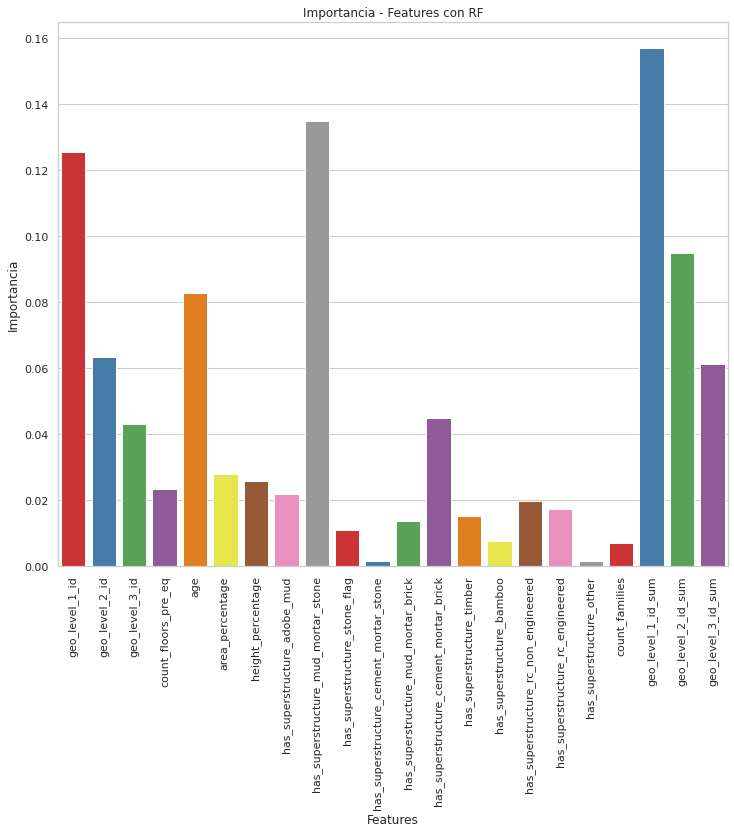

In [5]:
plt.figure(figsize=(12, 10))
sb.barplot(x=X_train.columns, y=rf_model.feature_importances_, palette='Set1')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia - Features con RF')
plt.show()

In [4]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
f1 = f1_score(y_test, rf_preds, average='micro')
print("F1 Score", f1)

F1 Score 0.7215379302405894


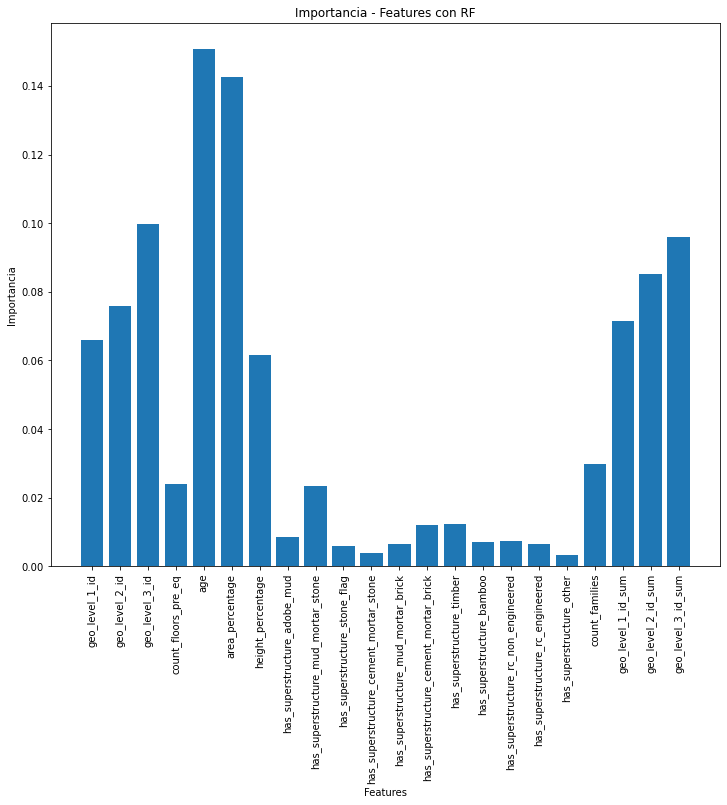

In [5]:
plt.figure(figsize=(12, 10))
plt.bar(X_train.columns, rf_model.feature_importances_)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Importancia - Features con RF')
plt.show()